In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

Text(0.5, 0, 'pulse search window (start_stop)')

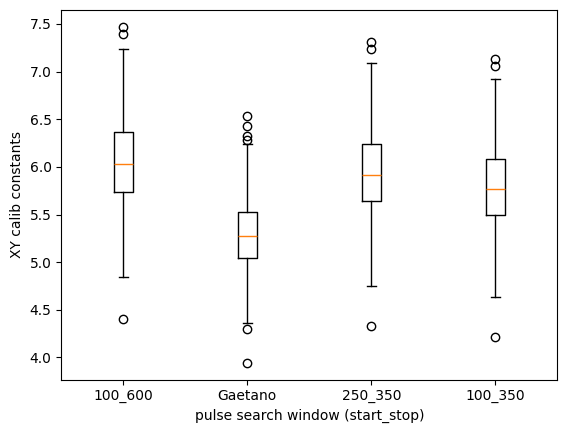

In [25]:
pos = 0

for file in os.listdir():
    if not file.startswith('outCorr'): continue

    pulse_interval = file[-11:-4]
    if 'Fix' in file: pulse_interval = 'Gaetano'

    calib_const_corr = np.loadtxt(file, usecols=[-1])

    plt.boxplot(calib_const_corr, positions=[pos], tick_labels=[pulse_interval])

    pos += 1

plt.ylabel('XY calib constants')
plt.xlabel("pulse search window (start_stop)")

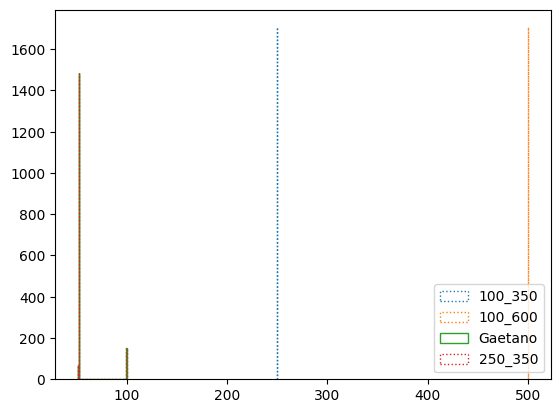

In [14]:
for file in os.listdir():
    if not file.startswith('pulseTiming'): continue
    ls=':'

    pulse_interval = file[-11:-4]
    if 'Fix' in file: 
        pulse_interval = 'Gaetano'
        ls='solid'

    pulse_length = np.loadtxt(file, usecols=[3])

    plt.hist(pulse_length, histtype='step', label=pulse_interval, bins=100, ls=ls)

plt.legend()



In [19]:
gaetano = np.loadtxt('outCorrFix_15487.txt', usecols=[-1])
paul = np.loadtxt('outCorr_15487_250_350.txt', usecols=[-1])

Text(0.5, 0, 'Gaetano result / Paul result')

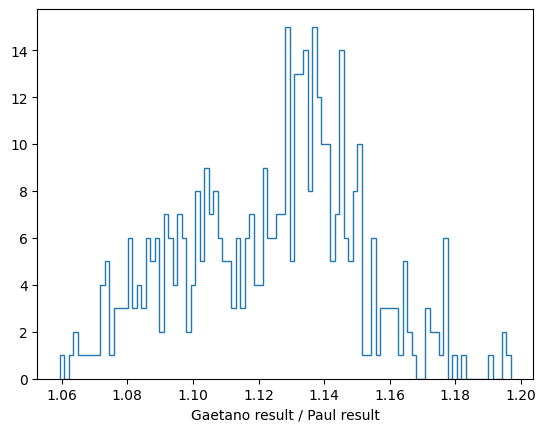

In [22]:
plt.hist(paul/gaetano, bins=100, histtype='step')

plt.xlabel("Gaetano result / Paul result")